<a href="https://colab.research.google.com/github/tohnperfect/data_viz/blob/main/Pandas102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

path = '/content/drive/My Drive/dataviz_2021_data'

covid_file_path = os.path.join(path,'pm-20-jan-2021.csv') 
print(covid_file_path)

/content/drive/My Drive/dataviz_2021_data/pm-20-jan-2021.csv


In [4]:
data_covid = pd.read_csv(covid_file_path)
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


# .isnull()?? None??  

In [5]:
data_covid.isnull()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,False,False,True,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
12648,False,False,False,False,False,False,False,False,False,False
12649,False,False,False,False,False,False,False,False,False,False
12650,False,False,False,False,False,False,False,False,False,False
12651,False,False,False,False,False,False,False,False,False,False


.any() เอาค่าความจริงภายในแต่ละ column มา ```OR``` กัน  

In [6]:
data_covid.isnull().any()

No.                      False
announce_date            False
notification_date         True
sex                       True
age                       True
nationality               True
province_of_isolation     True
province_of_onset         True
district_of_onset         True
risk                      True
dtype: bool

.all() เอาค่าความจริงภายในแต่ละ column มา ```AND``` กัน  

In [7]:
data_covid.isnull().all()

No.                      False
announce_date            False
notification_date        False
sex                      False
age                      False
nationality              False
province_of_isolation    False
province_of_onset        False
district_of_onset        False
risk                     False
dtype: bool

In [8]:
data_covid.iloc[0,0].isnull()

AttributeError: ignored

In [9]:
data_covid['No.'][0].isnull()

AttributeError: ignored

In [10]:
data_covid.iloc[0,0]

1

In [11]:
data_covid.iloc[:1,0].isnull()

0    False
Name: No., dtype: bool

# ต่อตารางแกน X แกน y


*   ต่อแกน y คือ เพิ่ม records (เพิ่มจำนวนข้อมูล)
*   ต่อแกน x คือ เพิ่ม columns (เพิ่มรายละเอียดของข้อมูล)



## ต่อแกน Y pd.concat()

In [12]:
data_covid['province_of_onset']=='ขอนแก่น'

0        False
1        False
2        False
3        False
4        False
         ...  
12648    False
12649    False
12650    False
12651    False
12652    False
Name: province_of_onset, Length: 12653, dtype: bool

In [13]:
dataKK = data_covid[data_covid['province_of_onset']=='ขอนแก่น']
dataKK.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ


In [14]:
dataUD = data_covid[data_covid['province_of_onset']=='อุดรธานี']
dataUD.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
424,425,3/22/2020,3/21/2020,ชาย,33.0,Thailand,อุดรธานี,อุดรธานี,กุดจับ,สนามมวย
434,435,3/22/2020,3/20/2020,หญิง,47.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
471,472,3/22/2020,3/22/2020,หญิง,26.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
883,884,3/25/2020,3/24/2020,ชาย,25.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สถานบันเทิง
885,886,3/25/2020,3/24/2020,หญิง,20.0,Thailand,อุดรธานี,อุดรธานี,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


In [15]:
dataMS = data_covid[data_covid['province_of_onset']=='มหาสารคาม']
dataMS.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
346,347,3/21/2020,3/20/2020,ชาย,34.0,Thailand,นนทบุรี,มหาสารคาม,เชียงยืน,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
789,790,3/24/2020,3/28/2020,ชาย,48.0,Thailand,มหาสารคาม,มหาสารคาม,พยัคฆภูมิพิสัย,สถานบันเทิง
6690,6691,12/31/2020,12/30/2020,หญิง,42.0,Thailand,มหาสารคาม,มหาสารคาม,บรบือ,Cluster สมุทรสาคร
10802,10803,1/12/2021,1/11/2021,หญิง,25.0,Thailand,สมุทรสาคร,มหาสารคาม,วาปีปทุม,Cluster สมุทรสาคร


In [16]:
dataMYisan = pd.concat([dataKK,dataUD,dataMS])
dataMYisan

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
180,181,3/18/2020,3/15/2020,ชาย,33.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สนามมวย
462,463,3/22/2020,3/21/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1466,1467,3/30/2020,3/26/2020,ชาย,19.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,คนไทยเดินทางกลับจากต่างประเทศ
1970,1971,4/3/2020,3/31/2020,หญิง,70.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว
2637,2638,4/15/2020,4/14/2020,หญิง,63.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสผู้เดินทางจากต่างประเทศ
2673,2674,4/17/2020,4/16/2020,ชาย,68.0,Thailand,ขอนแก่น,ขอนแก่น,น้ำพอง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
5948,5949,12/26/2020,12/25/2020,หญิง,32.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
6082,6083,12/27/2020,12/26/2020,หญิง,36.0,Thailand,ขอนแก่น,ขอนแก่น,แวงใหญ่,Cluster สมุทรสาคร
9333,9334,1/7/2021,1/6/2021,ชาย,17.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,อยู่ระหว่างการสอบสวน
9334,9335,1/7/2021,1/6/2021,ชาย,20.0,Thailand,ขอนแก่น,ขอนแก่น,เมือง,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้


## ต่อแกน X 


*   จับ 2 ตารางมาต่อกันเลย (merge)
*   เลือกมาเพิ่มเฉพาะบาง column (map)



In [19]:
data_province = data_covid[['No.','announce_date','province_of_onset']]
data_province

,No.,announce_date,province_of_onset
0,1,1/12/2020,กรุงเทพมหานคร
1,2,1/17/2020,กรุงเทพมหานคร
2,3,1/22/2020,นครปฐม
3,4,1/22/2020,กรุงเทพมหานคร
4,5,1/24/2020,กรุงเทพมหานคร
...,...,...,...
12648,12649,1/20/2021,ชลบุรี
12649,12650,1/20/2021,ระยอง
12650,12651,1/20/2021,ระยอง
12651,12652,1/20/2021,ระยอง


In [20]:
data_human = data_covid[['No.','age','sex','nationality']]
data_human

,No.,age,sex,nationality
0,1,61.0,หญิง,China
1,2,74.0,หญิง,China
2,3,73.0,หญิง,Thailand
3,4,68.0,ชาย,China
4,5,66.0,หญิง,China
...,...,...,...,...
12648,12649,44.0,หญิง,Thailand
12649,12650,52.0,หญิง,Thailand
12650,12651,23.0,หญิง,Thailand
12651,12652,29.0,หญิง,Thailand


# แบบง่าย รู้ว่าสองตาราง record ตรงกัน

In [21]:
full_table1 = data_human.merge(data_province)
full_table1.head()

,No.,age,sex,nationality,announce_date,province_of_onset
0,1,61.0,หญิง,China,1/12/2020,กรุงเทพมหานคร
1,2,74.0,หญิง,China,1/17/2020,กรุงเทพมหานคร
2,3,73.0,หญิง,Thailand,1/22/2020,นครปฐม
3,4,68.0,ชาย,China,1/22/2020,กรุงเทพมหานคร
4,5,66.0,หญิง,China,1/24/2020,กรุงเทพมหานคร


## sort

In [22]:
data_human2 = data_human.sort_values('age')
data_human2

,No.,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
11497,11498,0.11,ชาย,Burma
6477,6478,0.11,หญิง,Thailand
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand
...,...,...,...,...
12635,12636,NaN,NaN,Thailand
12636,12637,NaN,NaN,Thailand
12637,12638,NaN,NaN,Thailand
12638,12639,NaN,NaN,Thailand


In [23]:
full_table2 = data_human2.merge(data_province)
full_table2.head()

,No.,age,sex,nationality,announce_date,province_of_onset
0,1988,0.10,ชาย,Thailand,4/4/2020,ระยอง
1,11498,0.11,ชาย,Burma,1/16/2021,สมุทรสาคร
2,6478,0.11,หญิง,Thailand,12/30/2020,เพชรบุรี
3,1676,0.30,ชาย,Japan,4/1/2020,กรุงเทพมหานคร
4,1076,0.40,ชาย,Thailand,3/27/2020,สุราษฎร์ธานี


In [24]:
data_human2_renamed = data_human2.rename(columns={'No.': 'patientNumber'})
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
11497,11498,0.11,ชาย,Burma
6477,6478,0.11,หญิง,Thailand
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [25]:
data_human2_renamed.merge(data_province)

MergeError: ignored

In [26]:
full_table3 = data_human2_renamed.merge(data_province,left_on='patientNumber',right_on='No.')
full_table3.head()

,patientNumber,age,sex,nationality,No.,announce_date,province_of_onset
0,1988,0.10,ชาย,Thailand,1988,4/4/2020,ระยอง
1,11498,0.11,ชาย,Burma,11498,1/16/2021,สมุทรสาคร
2,6478,0.11,หญิง,Thailand,6478,12/30/2020,เพชรบุรี
3,1676,0.30,ชาย,Japan,1676,4/1/2020,กรุงเทพมหานคร
4,1076,0.40,ชาย,Thailand,1076,3/27/2020,สุราษฎร์ธานี


## map() เลือกมาเฉพาะบาง column มาแปะเพิ่มเข้าไป

In [27]:
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
11497,11498,0.11,ชาย,Burma
6477,6478,0.11,หญิง,Thailand
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [28]:
data_covid.head()

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
0,1,1/12/2020,NaN,หญิง,61.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
1,2,1/17/2020,NaN,หญิง,74.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
2,3,1/22/2020,NaN,หญิง,73.0,Thailand,นครปฐม,นครปฐม,เมือง,คนต่างชาติเดินทางมาจากต่างประเทศ
3,4,1/22/2020,NaN,ชาย,68.0,China,กรุงเทพมหานคร,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ
4,5,1/24/2020,NaN,หญิง,66.0,China,นนทบุรี,กรุงเทพมหานคร,NaN,คนต่างชาติเดินทางมาจากต่างประเทศ


คุณสมบัติของ pandas ก็คือเราสามารถสร้าง column ใหม่ให้ตาราง df ได้ โดย 

```df['ชื่อ column ใหม่'] = (list ที่มีจำนวนสมาชิกเท่ากับจำนวน record ของ df)```

In [29]:
data_human2_renamed.head()

,patientNumber,age,sex,nationality
1987,1988,0.10,ชาย,Thailand
11497,11498,0.11,ชาย,Burma
6477,6478,0.11,หญิง,Thailand
1675,1676,0.30,ชาย,Japan
1075,1076,0.40,ชาย,Thailand


In [30]:
data_human2_renamed['num'] = range(data_human2_renamed.shape[0])
data_human2_renamed

,patientNumber,age,sex,nationality,num
1987,1988,0.10,ชาย,Thailand,0
11497,11498,0.11,ชาย,Burma,1
6477,6478,0.11,หญิง,Thailand,2
1675,1676,0.30,ชาย,Japan,3
1075,1076,0.40,ชาย,Thailand,4
...,...,...,...,...,...
12635,12636,NaN,NaN,Thailand,12648
12636,12637,NaN,NaN,Thailand,12649
12637,12638,NaN,NaN,Thailand,12650
12638,12639,NaN,NaN,Thailand,12651


In [31]:
data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk']) #.map มันจะ ผูกค่า 'patientNumber' กับ 'No.' เข้าด้วยกัน แล้ว return list ของค่า ['risk']

1987     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
11497                              Cluster สมุทรสาคร
6477     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1675     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075     สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
                            ...                     
12635                              Cluster สมุทรสาคร
12636                              Cluster สมุทรสาคร
12637                              Cluster สมุทรสาคร
12638                              Cluster สมุทรสาคร
12639                              Cluster สมุทรสาคร
Name: patientNumber, Length: 12653, dtype: object

In [32]:
data_human2_renamed['detail'] = data_human2_renamed['patientNumber'].map(data_covid.set_index('No.')['risk'])
data_human2_renamed

,patientNumber,age,sex,nationality,num,detail
1987,1988,0.10,ชาย,Thailand,0,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
11497,11498,0.11,ชาย,Burma,1,Cluster สมุทรสาคร
6477,6478,0.11,หญิง,Thailand,2,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1675,1676,0.30,ชาย,Japan,3,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
1075,1076,0.40,ชาย,Thailand,4,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้
...,...,...,...,...,...,...
12635,12636,NaN,NaN,Thailand,12648,Cluster สมุทรสาคร
12636,12637,NaN,NaN,Thailand,12649,Cluster สมุทรสาคร
12637,12638,NaN,NaN,Thailand,12650,Cluster สมุทรสาคร
12638,12639,NaN,NaN,Thailand,12651,Cluster สมุทรสาคร


## HW7 สร้างตารางใหม่ ที่ค่าใน ```sex``` เป็น missing ทั้งหมด  
- สรุปว่าทำไม record นั้นๆถึงเป็น missing

* .groupby
* create pandas table
* simple visualization
* save table

# .groupby()
https://www.kaggle.com/crawford/python-groupby-tutorial#

In [34]:
data_covid.groupby('nationality') ## จัดกลุ่มค่าที่เหมือนกันไว้ด้วยกัน

In [36]:
data_covid.groupby('nationality').count()

,No.,announce_date,notification_date,sex,age,province_of_isolation,province_of_onset,district_of_onset,risk
nationality,,,,,,,,,
Afghanistan,1,1,1,1,1,1,1,1,1
Albania,3,3,3,3,3,3,3,2,3
American,1,1,1,1,1,1,1,1,1
American,1,1,1,1,1,1,1,1,1
American Samoa,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
deutsch,1,1,1,1,1,1,1,1,1
thailand,2,2,2,2,2,2,2,2,2
ต่างด้าว,21,21,21,21,21,21,21,21,21


In [42]:
data_covid.groupby('nationality').mean()

,No.,age
nationality,,
Afghanistan,4346.000000,31.000000
Albania,2377.333333,40.666667
American,3862.000000,39.000000
American,3905.000000,46.000000
American Samoa,11687.000000,21.000000
...,...,...
deutsch,3898.000000,55.000000
thailand,6823.000000,53.500000
ต่างด้าว,2944.952381,20.000000


In [47]:
data_covid.groupby('nationality').max(' ') ### ทำไมใส่ ' ' แล้วรันได้!!

,No.,age
nationality,,
Afghanistan,4346,31.0
Albania,3522,51.0
American,3862,39.0
American,3905,46.0
American Samoa,11687,21.0
...,...,...
deutsch,3898,55.0
thailand,6824,57.0
ต่างด้าว,2998,43.0


ทำ HW7 ด้วย groupby()



In [48]:
data_covid['sex'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
12648    False
12649    False
12650    False
12651    False
12652    False
Name: sex, Length: 12653, dtype: bool

In [49]:
missing_sex = data_covid[data_covid['sex'].isnull()]
missing_sex

,No.,announce_date,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
4391,4392,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4392,4393,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4393,4394,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4394,4395,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
4395,4396,12/20/2020,NaN,NaN,NaN,Burma,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
...,...,...,...,...,...,...,...,...,...,...
12635,12636,1/20/2021,1/19/2021,NaN,NaN,Thailand,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
12636,12637,1/20/2021,1/19/2021,NaN,NaN,Thailand,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
12637,12638,1/20/2021,1/19/2021,NaN,NaN,Thailand,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร
12638,12639,1/20/2021,1/19/2021,NaN,NaN,Thailand,สมุทรสาคร,สมุทรสาคร,เมือง,Cluster สมุทรสาคร


In [50]:
missing_sex.groupby('nationality').describe()

No.                                    ...   age                  
              count         mean          std     min  ...   25%   50%   75%   max
nationality                                            ...                        
Burma        1366.0  5124.517570   472.244857  4392.0  ...   NaN   NaN   NaN   NaN
Cambodia       61.0  6861.278689   275.220828  6543.0  ...   NaN   NaN   NaN   NaN
Thailand       51.0  7819.274510  1649.397527  6272.0  ...  28.0  28.0  28.0  28.0

[3 rows x 16 columns]

In [51]:
missing_sex.groupby('province_of_onset').describe()

No.                           ...   age            
                    count         mean         std  ...   50%   75%   max
province_of_onset                                   ...                  
ชลบุรี               18.0  7506.055556    6.637436  ...  28.0  28.0  28.0
ระยอง                 6.0  6289.000000   49.010203  ...   NaN   NaN   NaN
สมุทรสาคร          1358.0  5136.421944  639.463677  ...   NaN   NaN   NaN

[3 rows x 16 columns]

In [53]:
missing_sex.groupby(['province_of_onset','nationality']).describe() ## groupby หลาย column

No.                ...   age      
                                count          mean  ...   75%   max
province_of_onset nationality                        ...            
ชลบุรี            Thailand       18.0   7506.055556  ...  28.0  28.0
ระยอง             Thailand        1.0   6389.000000  ...   NaN   NaN
สมุทรสาคร         Thailand        8.0  10251.125000  ...   NaN   NaN
                  Burma        1349.0   5103.564122  ...   NaN   NaN

[4 rows x 16 columns]

In [55]:
misssing_sex_no_burma = missing_sex[missing_sex['nationality']!='Burma']
misssing_sex_no_burma.groupby('risk').describe()

No.                             ...   age            
                      count          mean          std  ...   50%   75%   max
risk                                                    ...                  
Cluster ชลบุรี         18.0   7506.055556     6.637436  ...  28.0  28.0  28.0
Cluster ระยอง           7.0   6363.285714   201.569437  ...   NaN   NaN   NaN
Cluster สมุทรสาคร     895.0  11423.836872  1231.787200  ...   NaN   NaN   NaN
อยู่ระหว่างการสอบสวน   72.0   6854.111111   269.187068  ...   NaN   NaN   NaN

[4 rows x 16 columns]

In [56]:
missing_sex.groupby('risk').describe()

No.                            ...   age            
                       count         mean          std  ...   50%   75%   max
risk                                                    ...                  
Cluster ชลบุรี          18.0  7506.055556     6.637436  ...  28.0  28.0  28.0
Cluster ระยอง            8.0  6452.250000   313.277946  ...   NaN   NaN   NaN
Cluster สมุทรสาคร     2258.0  7619.011515  3200.279792  ...   NaN   NaN   NaN
อยู่ระหว่างการสอบสวน    74.0  6852.945946   269.058169  ...   NaN   NaN   NaN

[4 rows x 16 columns]

In [58]:
missing_sex[missing_sex['risk']=='Cluster สมุทรสาคร'].groupby('announce_date').count()

,No.,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
announce_date,,,,,,,,,
1/14/2021,172,172,0,0,0,172,0,0,172
1/17/2021,311,311,0,0,0,311,0,0,311
1/18/2021,269,269,0,0,0,269,0,0,269
1/20/2021,5,5,0,0,5,5,5,5,5
1/5/2021,4,4,0,0,0,4,1,1,4
1/7/2021,109,109,0,0,0,109,0,0,109
12/20/2020,516,0,0,0,516,516,516,516,516
12/21/2020,360,0,0,0,360,360,360,360,360
12/22/2020,397,0,0,0,397,397,397,397,397


## create pandas table
 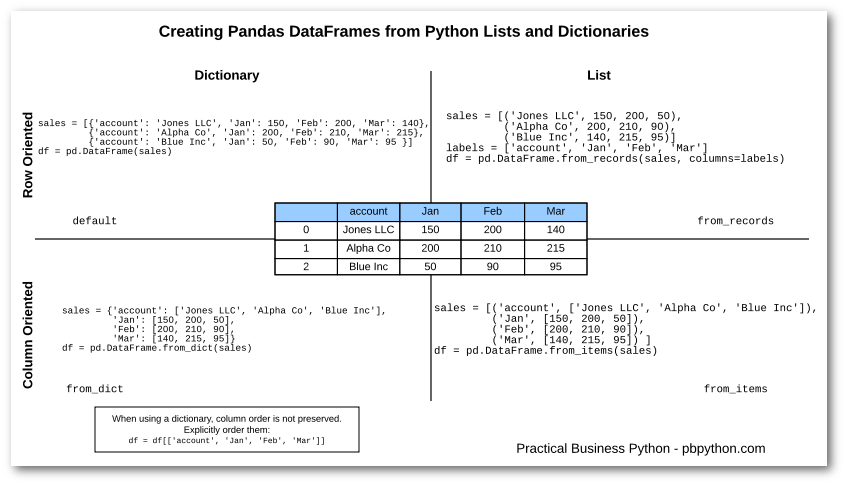

In [60]:
records = [{'account':'Jones LLC','Jan':150,'Feb':200,'Mar':140},
           {'account':'Alpha Co','Jan':200,'Feb':210,'Mar':215},
           {'account':'Blue Inc','Jan':50,'Feb':90,'Mar':95}]
records_df = pd.DataFrame(records)
records_df

,account,Jan,Feb,Mar
0,Jones LLC,150,200,140
1,Alpha Co,200,210,215
2,Blue Inc,50,90,95


## Simple Visualization

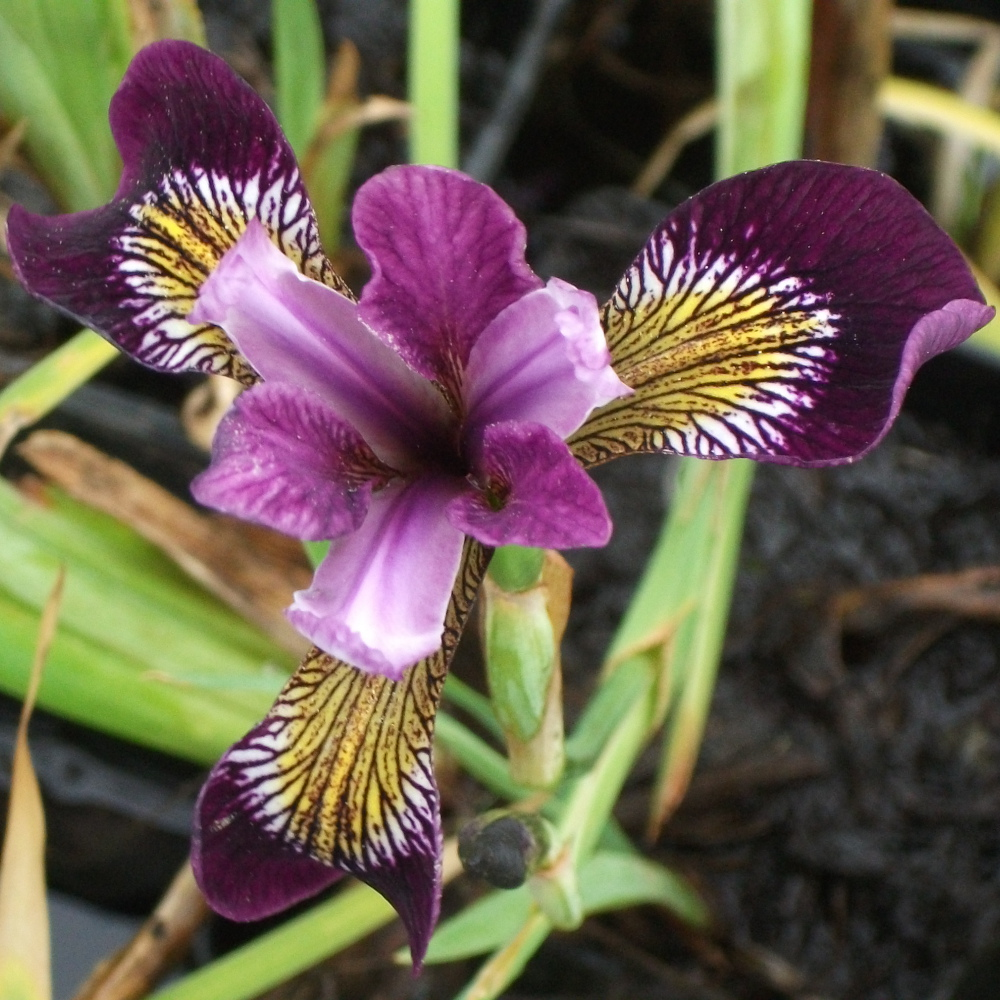

In [61]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [63]:
df.groupby('Name').count()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Name,,,,
Iris-setosa,50,50,50,50
Iris-versicolor,50,50,50,50
Iris-virginica,50,50,50,50


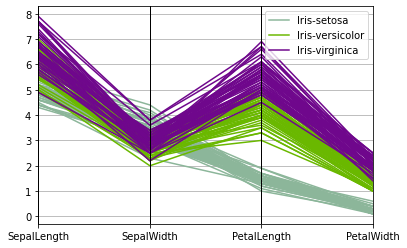

In [68]:
pd.plotting.parallel_coordinates(df, 'Name');

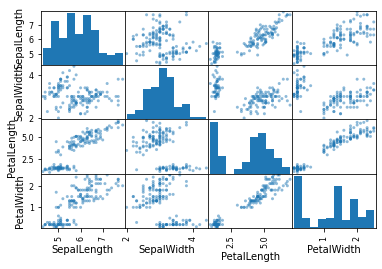

In [70]:
pd.plotting.scatter_matrix(df);

## save table

In [71]:
announce_date_count = missing_sex[missing_sex['risk']=='Cluster สมุทรสาคร'].groupby('announce_date').count()
announce_date_count

,No.,notification_date,sex,age,nationality,province_of_isolation,province_of_onset,district_of_onset,risk
announce_date,,,,,,,,,
1/14/2021,172,172,0,0,0,172,0,0,172
1/17/2021,311,311,0,0,0,311,0,0,311
1/18/2021,269,269,0,0,0,269,0,0,269
1/20/2021,5,5,0,0,5,5,5,5,5
1/5/2021,4,4,0,0,0,4,1,1,4
1/7/2021,109,109,0,0,0,109,0,0,109
12/20/2020,516,0,0,0,516,516,516,516,516
12/21/2020,360,0,0,0,360,360,360,360,360
12/22/2020,397,0,0,0,397,397,397,397,397


In [72]:
announce_date_count.to_csv('announce_date_count.csv')